In [4]:
import numpy as np
import lowRank as lR
import generator as g
import utils as u
from math import sqrt, log
import sympy as sp
import sdp
import experiments as exps

%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=5, suppress=True)

## 1. Recovering $B^\star$ from $B^\star + \Delta + W_1$: Lower coherence

In [176]:
n = 1000   # Size of the matrix
m = 10

### SDP

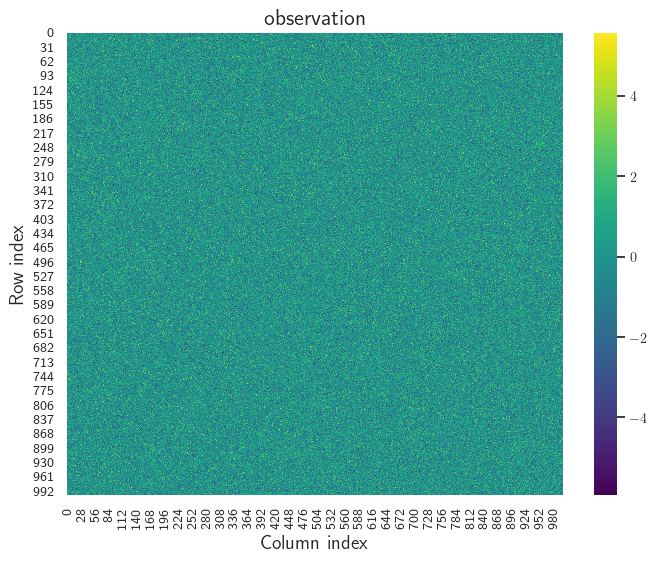

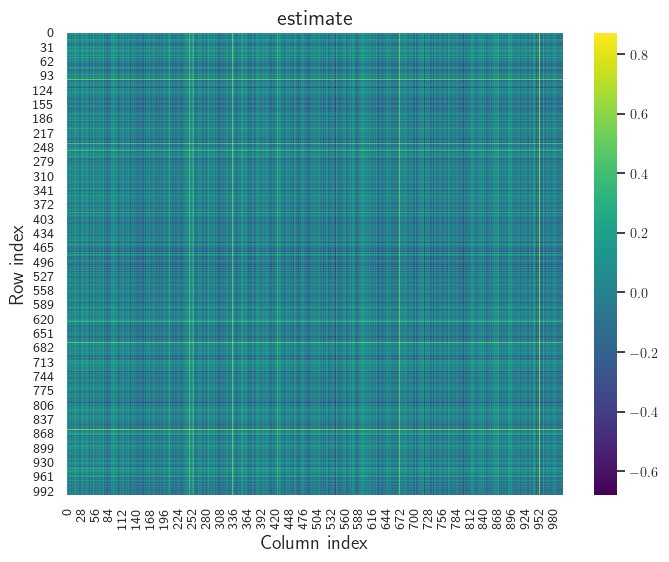

CPU times: user 29.6 s, sys: 8.03 s, total: 37.6 s
Wall time: 24.4 s


{'error': 0}

In [179]:
%%time
exps.exp_low_rank_Bstar(n,m, verbose=True)

### Group Lasso 

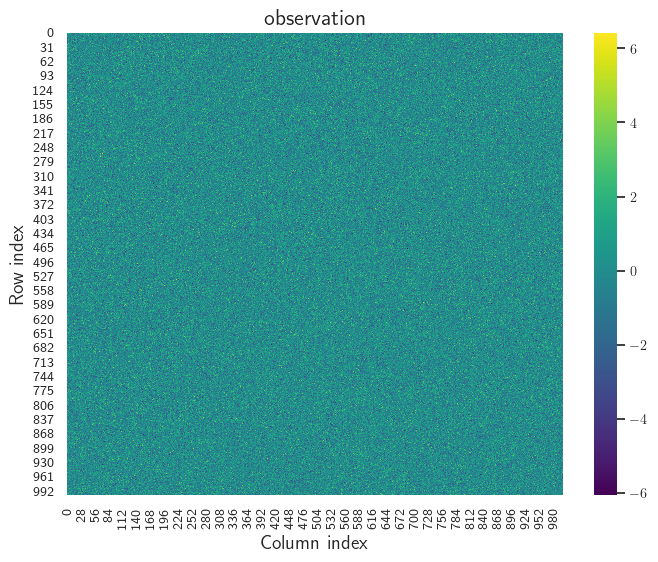

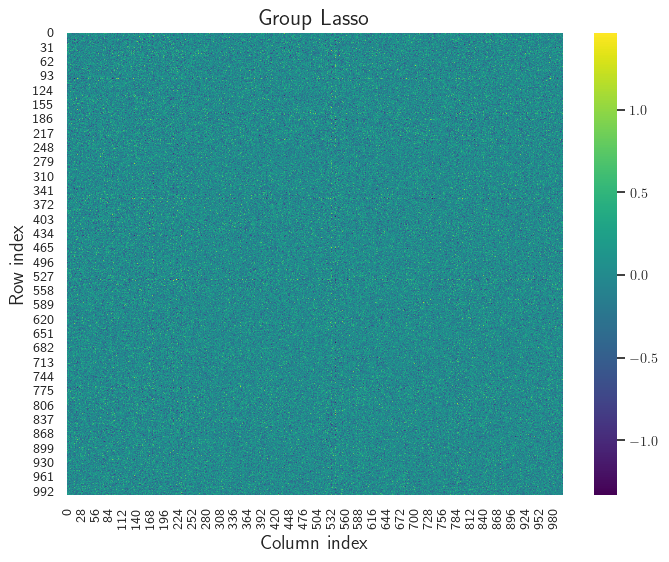

CPU times: user 40.9 s, sys: 28.1 s, total: 1min 9s
Wall time: 8.62 s


{'error': 1}

In [181]:
%%time
exps.exp_low_rank_Bstar(n,m, method="lasso", verbose=True)

## 2. Recovering $B^\star$ from $B^\star + \Delta + W_1$: High coherence ($n^{1/2}\sqrt{\log(n)}$ and $n^{1/2}\log(n)$)

In [137]:
n, m = 400, 5

### SDP

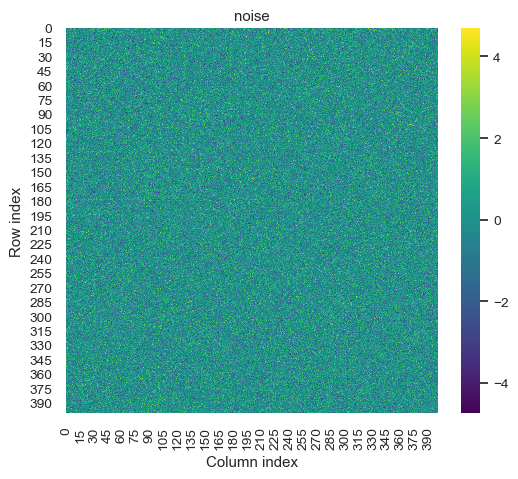

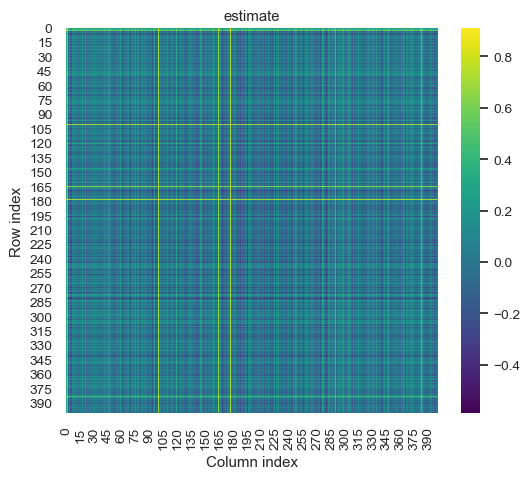

CPU times: user 4.67 s, sys: 3.12 s, total: 7.78 s
Wall time: 1.86 s


{'error': 1,
 'Ihat': array([  2,  99, 164, 177, 382]),
 'Istar': array([ 99, 164, 177, 290, 382])}

In [140]:
%%time
exps.exp_low_rank_Bstar(n,m, verbose=True, mu=n**(1/2)*log(n))

### Lasso

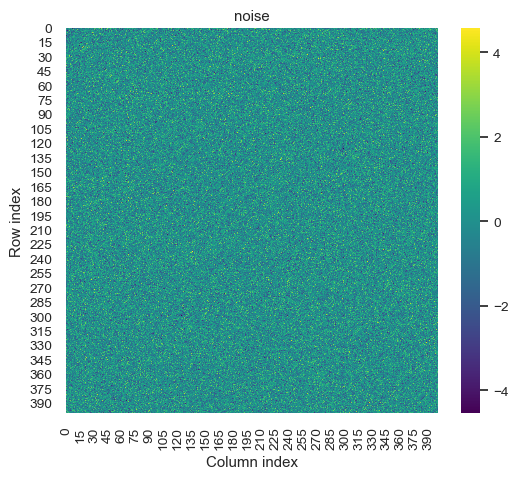

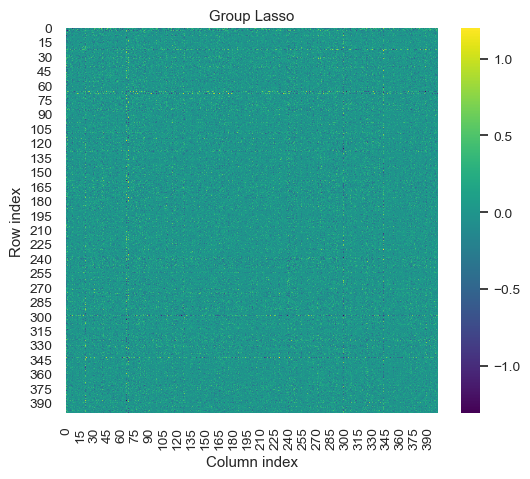

CPU times: user 7.82 s, sys: 6.42 s, total: 14.2 s
Wall time: 1.7 s


{'error': 0,
 'Ihat': array([ 21,  65,  67, 298, 341]),
 'Istar': array([ 21,  65,  67, 298, 341])}

In [143]:
%%time
exps.exp_low_rank_Bstar(n,m, method="lasso", verbose=True, mu=n**(1/2)*log(n))

## 3. Lasso Solution Path

  0%|          | 0/60 [00:00<?, ?it/s]

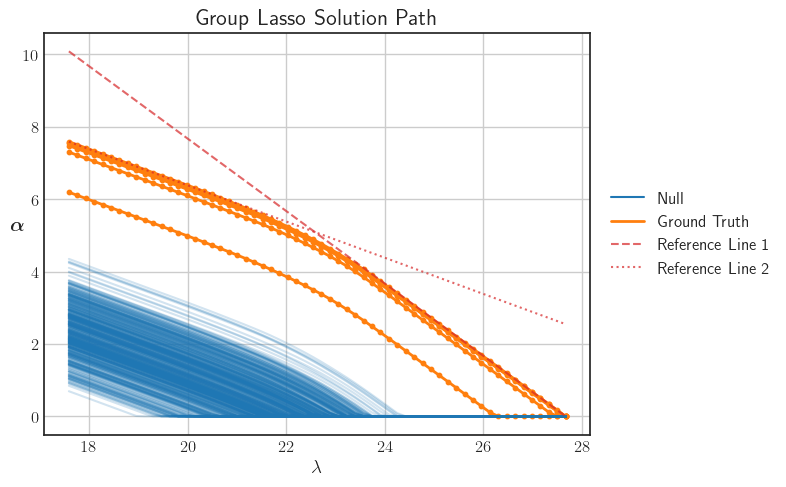

In [184]:
n, m = 500, 5
exps.exp_lasso_path(n, m)

## 4. Lasso Failure

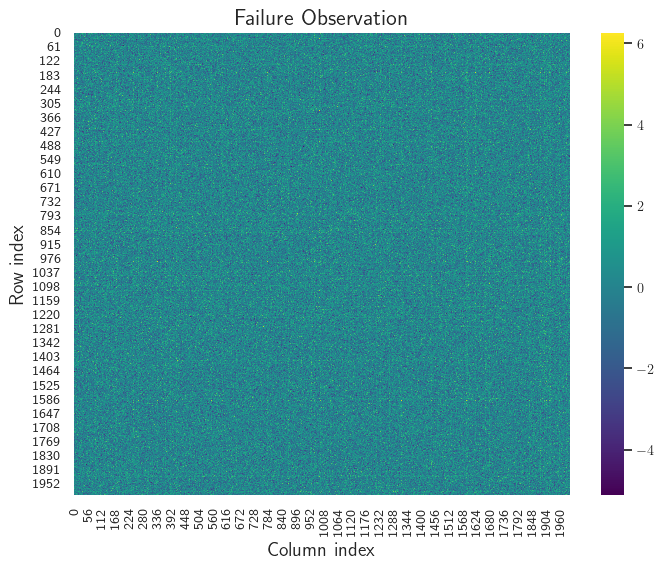

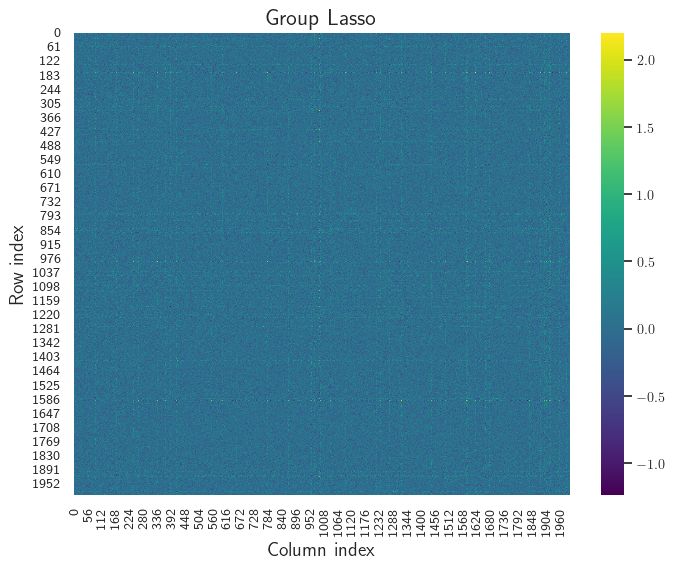

{'error': 10,
 'Ihat': array([  34,   52,   58,   65,   68,   86,  100,  133,  136,  170,  171,
         177,  190,  239,  259,  265,  288,  289,  298,  312,  318,  336,
         346,  363,  367,  368,  386,  388,  393,  412,  418,  470,  482,
         507,  553,  569,  585,  598,  603,  619,  629,  655,  679,  681,
         718,  745,  779,  781,  786,  797,  802,  812,  826,  845,  846,
         854,  855,  861,  864,  873,  899,  919,  957,  969,  989,  993,
         994, 1006, 1032, 1033, 1050, 1077, 1093, 1094, 1108, 1121, 1176,
        1184, 1219, 1220, 1232, 1235, 1271, 1296, 1298, 1304, 1320, 1335,
        1365, 1385, 1418, 1441, 1447, 1497, 1534, 1544, 1572, 1579, 1580,
        1582, 1586, 1591, 1618, 1624, 1651, 1658, 1663, 1667, 1674, 1698,
        1714, 1836, 1839, 1847, 1880, 1896, 1898, 1916, 1920, 1925, 1927,
        1957, 1985]),
 'Istar': array([  24,   34,   52,   58,   65,   68,   86,  100,  133,  136,  170,
         177,  190,  239,  259,  265,  288,  289,  312,  31

In [48]:
n = 2000
m = int(sqrt(n*log(n)))
exps.exp_lasso_failure_Bstar(n, m, method="lasso", verbose=True)

## 5. SDP Succeeds

In [52]:
n = 2000
m = int(sqrt(n*log(n)))
exps.exp_lasso_failure_Bstar(n, m)

{'error': 0,
 'Ihat': array([   6,    8,   86,  102,  125,  132,  151,  168,  169,  185,  195,
         207,  212,  215,  222,  247,  249,  282,  292,  296,  310,  326,
         328,  353,  375,  385,  408,  433,  463,  484,  499,  502,  532,
         617,  622,  626,  634,  637,  651,  666,  756,  773,  777,  800,
         807,  834,  837,  841,  857,  859,  867,  874,  875,  877,  924,
         931,  946,  991, 1006, 1012, 1013, 1028, 1074, 1094, 1097, 1112,
        1116, 1120, 1125, 1139, 1147, 1161, 1171, 1172, 1173, 1196, 1216,
        1233, 1265, 1292, 1295, 1300, 1307, 1320, 1341, 1368, 1399, 1409,
        1443, 1474, 1490, 1500, 1508, 1519, 1524, 1538, 1545, 1548, 1557,
        1600, 1607, 1608, 1641, 1676, 1691, 1695, 1702, 1731, 1757, 1761,
        1792, 1810, 1848, 1864, 1895, 1916, 1925, 1942, 1949, 1957, 1975,
        1991, 1992]),
 'Istar': array([   6,    8,   86,  102,  125,  132,  151,  168,  169,  185,  195,
         207,  212,  215,  222,  247,  249,  282,  292,  296

## 6. Failure under Heteroskedastic noise

In [93]:
n = 1600   # Size of the matrix
m = 10

### SDP

In [124]:
exps.exp_single_heter(n, m)

{'error': 4,
 'Ihat': array([ 136,  159,  164,  431,  484, 1429, 1461, 1496, 1638, 1814]),
 'Istar': array([ 159,  164,  420,  431,  656, 1230, 1429, 1496, 1712, 1814])}

### Lasso

In [126]:
exps.exp_single_heter(n, m, method="lasso")

{'error': 5,
 'Ihat': array([ 228,  729,  765,  796,  929, 1024, 1274, 1381, 1832, 1847]),
 'Istar': array([ 228,  572,  708,  729,  796,  929, 1312, 1633, 1770, 1832])}

## 7. Success with multiple observations under Heteroskedastic noise

In [192]:
n = 800   # Size of the matrix
m = 10
exps.exp_dual_heter(n, m)

{'multiple_error': 0, 'single_error': 6}

## 8. Truncated SDP for Heavy-tailed noise

In [156]:
n = 1000   # Size of the matrix
m = 10
exps.exp_trunc(n, m)

{'trunc_error': 0, 'sdp_error': 10}

## 9. Improved Low-Rank Estimation

In [425]:
n = 16000   # Size of the matrix
r = 1
mu = n**(5/6)
results, Ustar = exps.exp_low_rank(n, mu)

In [413]:
results

{'Uhat_error': 0.054919860020383425,
 'Mhat_error': 3.4747451522699038,
 'Ubase_error': 0.028608649486369594,
 'Mbase_error': 1.364272499745192,
 'Uspec_error': 0.03350663111931086,
 'Mspec_error': 1.6733360638415036}

In [419]:
results

{'Uhat_error': 0.02882799203280181,
 'Mhat_error': 2.780462084791194,
 'Ubase_error': 0.022007295616273535,
 'Mbase_error': 1.7544491497753012,
 'Uspec_error': 0.020225534743667156,
 'Mspec_error': 1.858086200553763}

In [423]:
results

{'Uhat_error': 0.017570300848586365,
 'Mhat_error': 4.2328194675036315,
 'Ubase_error': 0.014114416078934397,
 'Mbase_error': 2.2216980037490153,
 'Uspec_error': 0.025347229416500763,
 'Mspec_error': 2.079592301844389}

In [427]:
results

{'Uhat_error': 0.013433093454081842,
 'Mhat_error': 2.4498715465736853,
 'Ubase_error': 0.010618288556504612,
 'Mbase_error': 1.816415040674869,
 'Uspec_error': 0.021938159566567545,
 'Mspec_error': 1.8076227120386916}